<a href="https://colab.research.google.com/github/walledhany/House_price_kaggel/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Sun Jan 11 21:26:42 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.9.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
#1-self_diver
#2-Healthcare
##Energy Management

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [5]:
## overfitting in machine learing  is when model learn too much from data and and learn from data noise and ouiylayes and the model is good ans is too  poor in test

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1- used l1and l2 regluzation
2-eraly stopping
3=collect mor daat
4-dropuot for  cnn

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [7]:
training_data=datasets.FashionMNIST(
  root='data',
  train=True,
  download=True,
  transform=ToTensor()
)
Test_data=datasets.FashionMNIST(
 root='data',
 train=False,
  download=True,
   transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 175kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.45MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

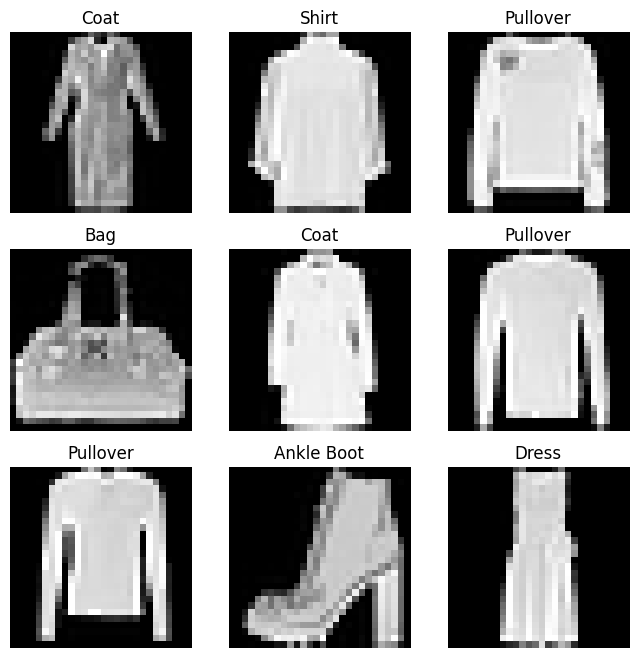

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure=plt.figure(figsize=(8,8))
cols,rows=3,3
for i in range(1, cols * rows + 1):
  sample_index=torch.randint(len(training_data),size=(1,)).item()
  img,label=training_data[sample_index]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [1]:
from torch.utils.data import  DataLoader


In [26]:
Training_data= DataLoader( training_data,batch_size=32,shuffle=True)
test_data=DataLoader(Test_data,batch_size=32,shuffle=False)


In [27]:
print(len(Training_data))

1875


In [28]:

print(len(test_data))

313


In [19]:
train_bacthn,siz=next(iter(training_data))

In [29]:
siz

9

In [30]:
test_t,siz=next(iter(test_data))

In [33]:
test_t.shape

torch.Size([32, 1, 28, 28])

In [34]:
train_bacthn.shape

torch.Size([1, 28, 28])

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
from torch import nn

In [36]:
class_lab=training_data.classes


10

In [42]:
class cnn_conv(nn.Module):
  def __init__(self,input:int,input_layer:int,out_put:int) :
    super().__init__()
    self.block1=nn.Sequential(
      nn.Conv2d(in_channels=input,out_channels=input_layer,kernel_size=3,stride=1,padding=1),
      nn.ReLU(),
       nn.Conv2d(in_channels=input_layer,out_channels=input_layer,kernel_size=3,stride=1,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2))
    self.block2=nn.Sequential(
             nn.Conv2d(in_channels=input_layer,out_channels=input_layer,kernel_size=3,stride=1,padding=1),
      nn.ReLU(),
       nn.Conv2d(in_channels=input_layer,out_channels=input_layer,kernel_size=3,stride=1,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2))
    self.classsf=nn.Sequential(
      nn.AdaptiveAvgPool2d((1,1)),
      nn.Flatten(),
      nn.Linear(in_features=input_layer,out_features=out_put)

    )


  def forward(self ,x):
    x=self.block1(x)
    x=self.block1(x)
    x=self.classsf(x)
    return(x)




In [45]:
devies=torch.device( 'cuda' if  torch.cuda.is_available() else  'cpu')
devies

device(type='cuda')

In [43]:
modle_1=cnn_conv(1,10,len(class_lab))

In [40]:
import time
start_timr=time.time()

In [48]:
import sys
!{sys.executable} -m pip install torchmetrics

In [49]:
import torch
import torchmetrics

# Example of using Accuracy for classification
# Let's say you have some predicted labels (logits or probabilities) and true labels

# Dummy example data
num_classes = len(class_lab) # From your notebook, class_lab is defined
predictions = torch.randint(0, num_classes, (32,)) # Example batch of 32 predicted class indices
targets = torch.randint(0, num_classes, (32,)) # Example batch of 32 true class indices

# Initialize the Accuracy metric for multiclass classification
# You can specify task='multiclass' and provide num_classes
accuracy_metric = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)

# Compute accuracy
acc = accuracy_metric(predictions, targets)
print(f"Example Accuracy: {acc:.4f}")

# You can also update the metric over batches and compute a final result
# For example, within your training loop:
# accuracy_metric.update(predictions_batch, targets_batch)
# final_accuracy = accuracy_metric.compute()

print("\nThis will be very useful when you train your model to track performance over epochs!")

Example Accuracy: 0.0000

This will be very useful when you train your model to track performance over epochs!


In [14]:
lost_functon=nn.CrossEntropyLoss()
opmtimz=torch.optim.SGD()

In [58]:
torch.manual_seed(42)
def train_model(model:torch.nn.Module,data:torch.utils.data.dataloader,lost_function:nn.Module,optimzer:torch.optim.Optimizer,accuracy_metric,devises:torch.device=devies):
  lost_fun=0
  acresry=0
  model.train().to(devies)
  for bacth, (X,y) in  enumerate(Training_data):
       X=X.to(devises)
       y=y.to(devises)
       x_preict=model(X)
       lost_function1=lost_function(x_preict,y)
       lost_fun+= lost_function1.item()
       accert_scor=accuracy_metric(y, x_preict)
       acresry+=accert_scor()
       optimzer.zero_grad()
       lost_function1.backward()
       optimzer.step()
  lost_fun/=len(training_data)
  acresry/=len(training_dat)
  print(f'lost_fun{ lost_fun} ,arecy{acresry}')

In [59]:
def test_model(model:torch.nn.Module,data:torch.utils.data.dataloader,lost_function:nn.Module,optimzer:torch.optim.Optimizer,accuracy_metric,devises:torch.device=devies):
    lost_test,areccy_lost=0.0,0.0
    model.eval()
    for x_test,y_test in test_data:
       model_test=model(x_test)
       lost_test_1=lost_function( model_test,y_test)
       aceercy=accuracy_metric(y_test,model_test)
       lost_test+=lost_test_1.item()
       areccy_lost+=aceercy()

    lost_test/=len(test_data)
    areccy_lost/=len(test_data)
    print(f'lost_fun{ lost_test} ,arecy{areccy_lost}')

Now you can proceed with defining your training and testing functions, and incorporate `torchmetrics` to evaluate your model's performance.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?